In [91]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sympy import *

In [92]:
data = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'Data.csv'), sep=',', header=None)
data.columns = data.iloc[0]
data = data.drop(0)
print(data.head())

0 Data Point # Motor Speed [RPM] Manometer delta P [dpsi] Ambient Temp.[R]  \
1     1.00E+00          4.00E+02                 5.78E-03         5.31E+02   
2     2.00E+00          5.00E+02                 9.03E-03         5.32E+02   
3     3.00E+00          6.00E+02                 1.30E-02         5.32E+02   
4     4.00E+00          7.00E+02                 1.84E-02         5.33E+02   
5     5.00E+00          8.00E+02                 2.46E-02         5.33E+02   

0 Viscosity [slug/ft s] Ambient Press. [psia]  \
1              3.81E-07              1.41E+01   
2              3.81E-07              1.41E+01   
3              3.81E-07              1.41E+01   
4              3.82E-07              1.41E+01   
5              3.82E-07              1.41E+01   

0 Omega Transmitter delta P [dpsi] RakeT1 [psid] RakeT2 [psid] RakeT3 [psid]  \
1                         5.51E-03      4.55E-03      4.46E-03      4.49E-03   
2                         8.92E-03      7.52E-03      7.39E-03      7.40E-03

-0.0004418414918415144 -3.222027972027894e-06 3.738344988344984e-08


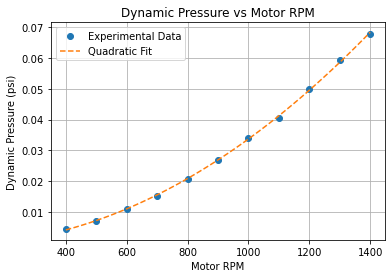

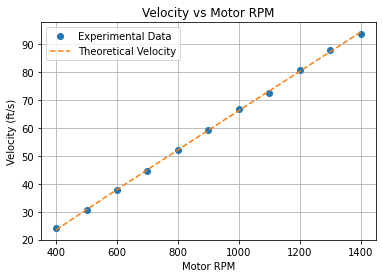

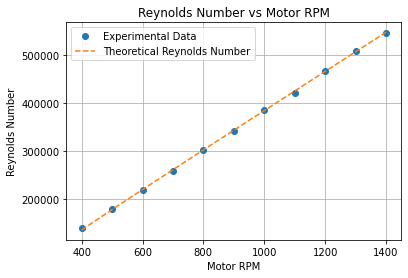

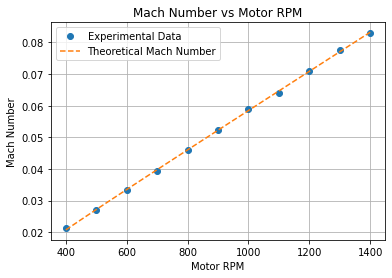

In [93]:
# Graphs for question 2
# Get motor rpm data
rpm = data.iloc[:, 1]
rpm = rpm.astype(float)

# Actual dynamic pressure vs Motor RPM
q = np.array(data['AverageDynamic [psid]'], dtype=float)
p_0_array = np.array(data['AverageTotal [psid]'], dtype=float)
p_array = np.array(data['AverageStatic [psid]'], dtype=float)
polyfit = np.polynomial.polynomial.polyfit(rpm, q, 2)
rpm_range = np.linspace(400, 1400, 100)
plt.figure()
plt.plot(rpm, q, 'o', label='Experimental Data')
plt.plot(rpm_range, polyfit[0] + polyfit[1]*rpm_range + polyfit[2]*rpm_range**2, '--', label='Quadratic Fit')
plt.xlabel('Motor RPM')
plt.ylabel('Dynamic Pressure (psi)')
plt.title('Dynamic Pressure vs Motor RPM')
plt.legend()
plt.grid()

# Actual velocity in the test section vs Motor RPM
p = np.array(data['Ambient Press. [psia]'], dtype=float)
T = np.array(data['Ambient Temp.[R]'], dtype=float)
R = 1717*12 # in lbf/lb R
rho = p/(R*T)*(12**3) # lb/ft^3
v = np.sqrt(2*q*144/(rho))
q_theory = polyfit[0] + polyfit[1]*rpm_range + polyfit[2]*rpm_range**2
print(polyfit[0], polyfit[1], polyfit[2])
v_theory = np.sqrt(2*(q_theory)*144/(np.mean(rho)))
# data['rho (lbm/ft^3)'] = rho
# data['v (ft/s)'] = v

plt.figure()
plt.plot(rpm, v, 'o', label='Experimental Data')
plt.plot(rpm_range, v_theory, '--', label='Theoretical Velocity')
plt.xlabel('Motor RPM')
plt.ylabel('Velocity (ft/s)')
plt.title('Velocity vs Motor RPM')
plt.legend()
plt.grid()

# Reynolds number vs Motor RPM
mu = np.array(data['Viscosity [slug/ft s]'], dtype=float)
Re = rho*v/mu
Re_theory = np.mean(rho)*v_theory/np.mean(mu)
# data['Re'] = Re
plt.figure()
plt.plot(rpm, Re, 'o', label='Experimental Data')
plt.plot(rpm_range, Re_theory, '--', label='Theoretical Reynolds Number')
plt.xlabel('Motor RPM')
plt.ylabel('Reynolds Number')
plt.title('Reynolds Number vs Motor RPM')
plt.legend()
plt.grid()

# MachMach number vs Motor RPM
M = v/np.sqrt(1.4*1717*T)
M_theory = v_theory/np.sqrt(1.4*1717*np.mean(T))
# data['Mach Number'] = M
plt.figure()
plt.plot(rpm, M, 'o', label='Experimental Data')
plt.plot(rpm_range, M_theory, '--', label='Theoretical Mach Number')
plt.xlabel('Motor RPM')
plt.ylabel('Mach Number')
plt.title('Mach Number vs Motor RPM')
plt.grid()
plt.legend()
plt.show()

# data.to_csv(os.path.join(os.getcwd(), 'Data', 'Data.csv'), index=False)

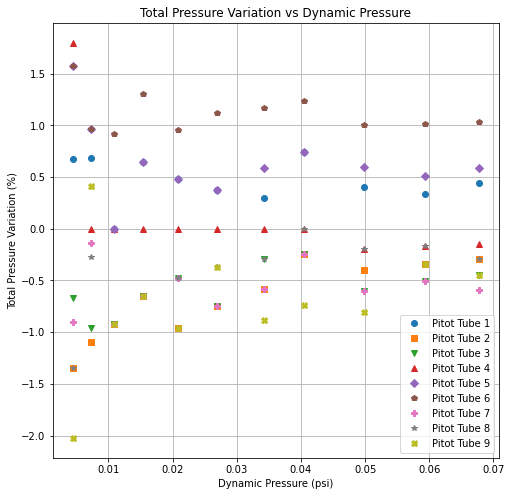

In [94]:
# Question 3
plt.figure(figsize=(8, 8))
markers = ['o', 's', 'v', '^', 'D', 'p', 'P', '*', 'X']
for i in range(9):
    p0 = np.array(data.iloc[:, 7+i], dtype=float)
    p_avg = np.array(data.iloc[:, 21], dtype=float)
    TPV = 100*(p0-p_avg)/q
    plt.plot(q, TPV, markers[i], label='Pitot Tube {}'.format(i+1))
    # print('Pitot Tube {}:'.format(i+1))
    # print(np.mean(TPV))
    # print(np.max(np.abs(TPV)))
    # print(np.std(TPV))
plt.xlabel('Dynamic Pressure (psi)')
plt.ylabel('Total Pressure Variation (%)')
plt.title('Total Pressure Variation vs Dynamic Pressure')
plt.grid()
plt.legend()
plt.show()

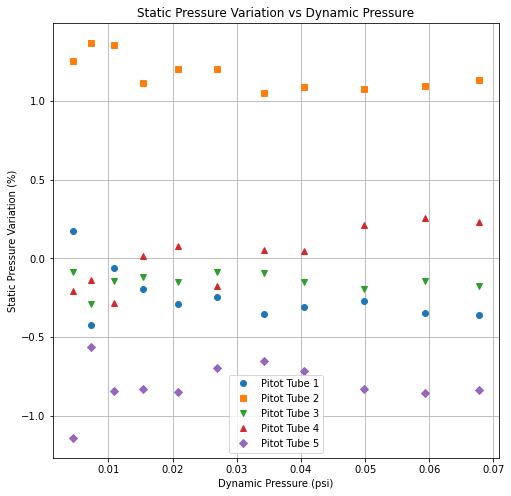

In [95]:
# Question 3b
plt.figure(figsize=(8, 8))
markers = ['o', 's', 'v', '^', 'D', 'p', 'P', '*', 'X']
for i in range(5):
    p0 = np.array(data.iloc[:, 16+i], dtype=float)
    p_avg = np.array(data.iloc[:, 22], dtype=float)
    SPV = 100*(p0-p_avg)/q
    plt.plot(q, SPV, markers[i], label='Pitot Tube {}'.format(i+1))
plt.xlabel('Dynamic Pressure (psi)')
plt.ylabel('Static Pressure Variation (%)')
plt.title('Static Pressure Variation vs Dynamic Pressure')
plt.grid()
plt.legend()
plt.show()

Slope: 0.8991244846762582


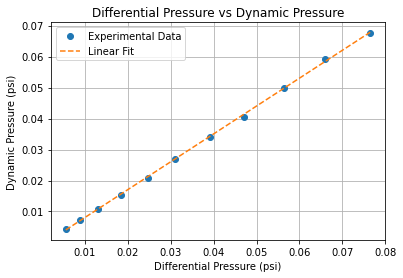

In [96]:
# Question 5
dp = np.array(data.iloc[:, 6], dtype=float)
plt.figure()
plt.plot(dp, q, 'o', label='Experimental Data')
plt.xlabel('Differential Pressure (psi)')
plt.ylabel('Dynamic Pressure (psi)')
plt.title('Differential Pressure vs Dynamic Pressure')

polyfit = np.polynomial.polynomial.polyfit(dp, q, 1)
plt.plot(dp, polyfit[0]+polyfit[1]*dp, '--', label='Linear Fit')

print('Slope: {}'.format(polyfit[1]))
plt.legend()
plt.grid()
plt.show()



In [97]:
# Question 6
pressure_uncertainty = .727 #psi
temp_uncertainty = 1.8 #F
rho_uncertainty = np.sqrt((1/(R*T)*pressure_uncertainty)**2 + (p/(R*T**2)*temp_uncertainty)**2)

PSI_uncertainity = .001 #psi
static_pressure_uncertainty = np.sqrt(5*(1/5*PSI_uncertainity)**2)
total_pressure_uncertainty = np.sqrt(9*(1/9*PSI_uncertainity)**2)

rho_uncertainty_contribution = (-np.sqrt((q)/rho)/(2*rho))*rho_uncertainty
static_pressure_uncertainty_contribution = (-np.sqrt((q)/rho)/(2*(q)))*static_pressure_uncertainty
total_pressure_uncertainty_contribution = (np.sqrt((q)/rho)/(2*(q)))*total_pressure_uncertainty

v_uncertainty = np.sqrt(rho_uncertainty_contribution**2 + static_pressure_uncertainty_contribution**2 + total_pressure_uncertainty_contribution**2)

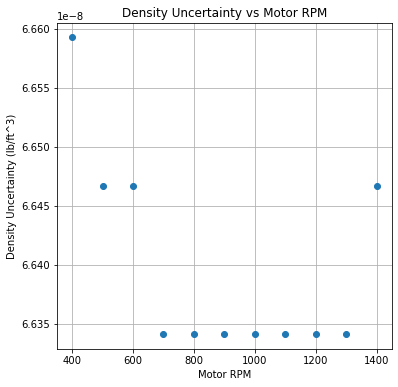

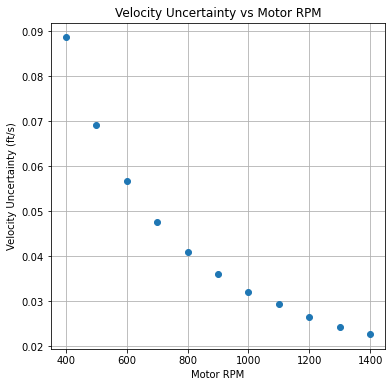

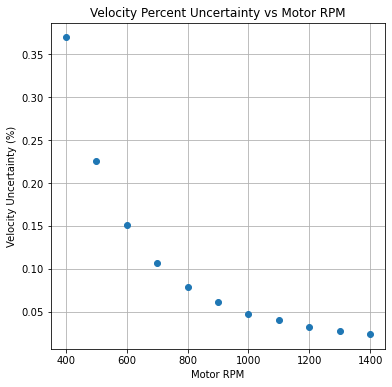

In [98]:
plt.figure(figsize=(6, 6))
plt.plot(rpm, rho_uncertainty, 'o')
plt.xlabel('Motor RPM')
plt.ylabel('Density Uncertainty (lb/ft^3)')
plt.title('Density Uncertainty vs Motor RPM')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(rpm, v_uncertainty, 'o')
plt.xlabel('Motor RPM')
plt.ylabel('Velocity Uncertainty (ft/s)')
plt.title('Velocity Uncertainty vs Motor RPM')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(rpm, v_uncertainty/v*100, 'o')
plt.xlabel('Motor RPM')
plt.ylabel('Velocity Uncertainty (%)')
plt.title('Velocity Percent Uncertainty vs Motor RPM')
plt.grid()
plt.show()

In [99]:
p0, p, rho_var = var('p_0, p, rho')
v = sqrt(2*(p0-p)/rho)
dvdp = diff(v, p)
dvdp0 = diff(v, p0)
dvdrho = diff(v, rho_var)